## Constrained clustering. PCK-Means

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint, shuffle
from sys import exit

## Initial data

In [0]:
points = pd.DataFrame({
    'x': [3,4,5,6,7,
            4,5,6,7,
            5,6,7,
            6,7,
            7,
            1,
            1,2,
            1,2,3,
            1,2,3,4,
            1,2,3,4,5],
    'y': [1,1,1,1,1,
            2,2,2,2,
            3,3,3,
            4,4,
            5,
            2,
            3,3,
            4,4,4,
            5,5,5,5,
            6,6,6,6,6]
})

## Must and cannot links

In [0]:
M = [
    [[1,4], [1,6]],
    [[1,4], [3,6]],
    [[3,1], [5,3]],
    [[5,3], [7,5]]
]

C = [
    [[1,4], [3,1]],
    [[5,3], [1,6]],
    [[7,5], [3,6]]
]

## Must and cannot matrices

#### 1-s mean bounds between points

In [0]:
M_mat = np.zeros((len(points), len(points)), dtype=np.int8)
for pair in M:
    i1, i2 = -1, -1
    for row, col in points.iterrows():
        if col.x == pair[0][0] and col.y == pair[0][1]:
            indx0 = row
        if col.x == pair[1][0] and col.y == pair[1][1]:
            indx1 = row
        if i1 > -1 and i2 > -1:
            break
    M_mat[indx0, indx1] = 1
    M_mat[indx1, indx0] = 1

C_mat = np.zeros((len(points), len(points)), dtype=np.int8)
for pair in C:
    i1, i2 = -1, -1
    for row, col in points.iterrows():
        if col.x == pair[0][0] and col.y == pair[0][1]:
            indx0 = row
        if col.x == pair[1][0] and col.y == pair[1][1]:
            indx1 = row
        if i1 > -1 and i2 > -1:
            break
    C_mat[indx0, indx1] = 1
    C_mat[indx1, indx0] = 1

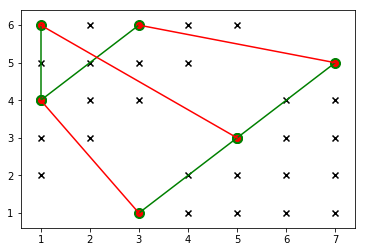

In [5]:
plt.scatter(points['x'], points['y'], c='k', marker='x');
for pair in M:
    plt.scatter([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], c='green', marker = 'o', s=100);
    plt.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], c='green');
    
for pair in C:
    plt.scatter([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], c='red', marker = 'o');
    plt.plot([pair[0][0], pair[1][0]], [pair[0][1], pair[1][1]], c='red');

## PCK-means

In [0]:
M_mat_df = pd.DataFrame(M_mat)
C_mat_df = pd.DataFrame(C_mat)

### Centers initialization (hardcode)

In [0]:
M_points_dict = {}
points2 = []

for pair in M:
    if M.index(pair) == 0:
        for point in pair:
            M_points_dict[tuple(point)] = 0
        continue
    for point in pair:
        if tuple(point) in list(M_points_dict.keys()):
            for point2 in pair:
                M_points_dict[tuple(point2)] = M_points_dict.get(tuple(point))
        else:
            M_points_dict[tuple(point)] = 1

x0, y0, x1, y1 = [], [], [], []
for key, val in M_points_dict.items():
    if val == 0:
        x0.append(key[0])
        y0.append(key[1])
    else:
        x1.append(key[0])
        y1.append(key[1])

### Parameters

In [8]:
k = 2
c0 = [sum(x0)/len(x0), sum(y0)/len(y0)]
c1 = [sum(x1)/len(x1), sum(y1)/len(y1)]
w = 10

dist_sum = 0


# points processing order
points_list = list(range(len(points.x)))
shuffle(points_list)
print(points_list)

print('Check constraints')
print('Must')
for pair in M:
    print(pair)
print('Cannot')
for pair in C:
    print(pair)

[8, 28, 24, 14, 9, 19, 11, 2, 10, 27, 20, 22, 4, 25, 17, 5, 13, 16, 29, 3, 7, 21, 15, 12, 18, 0, 23, 6, 1, 26]
Check constraints
Must
[[1, 4], [1, 6]]
[[1, 4], [3, 6]]
[[3, 1], [5, 3]]
[[5, 3], [7, 5]]
Cannot
[[1, 4], [3, 1]]
[[5, 3], [1, 6]]
[[7, 5], [3, 6]]


_______________________

Center 0: [1.667, 5.333] 
Center 1: [5.0, 3.0]


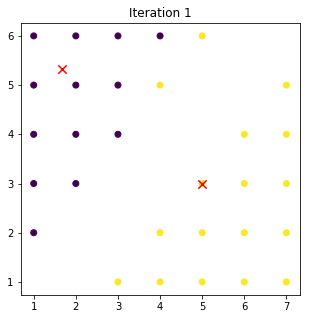

Distance sum =  58.444
_______________________

Center 0: [2.0, 4.538] 
Center 1: [5.529, 2.706]


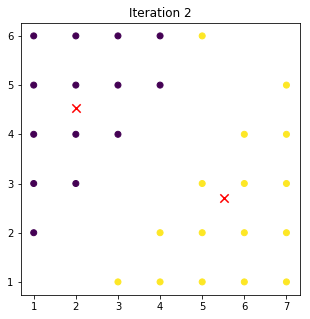

Distance sum =  48.803
_______________________

Center 0: [2.143, 4.571] 
Center 1: [5.625, 2.562]


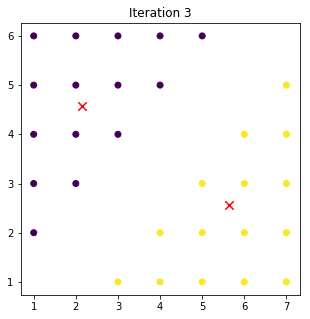

Distance sum =  47.414
_______________________

Center 0: [2.333, 4.667] 
Center 1: [5.667, 2.333]


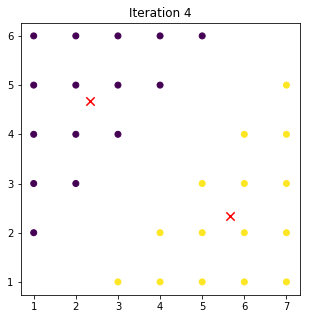

Distance sum =  46.667
_______________________

Center 0: [2.333, 4.667] 
Center 1: [5.667, 2.333]


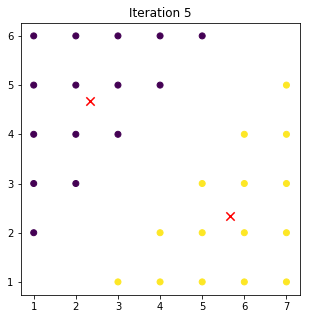

46.667
Converge!


In [9]:
# converging
iteration = 1
J=0
while True:
    print('_______________________')
    print()
    print("Center 0:", list(map(lambda x: round(x, 3), c0)), '\n'
          "Center 1:", list(map(lambda x: round(x, 3), c1)))
    
    #all distances
    points['dist0'] = list(map(lambda x,y: ((c0[0]-x)**2 + (c0[1]-y)**2)**0.5, points.x, points.y))
    points['dist1'] = list(map(lambda x,y: ((c1[0]-x)**2 + (c1[1]-y)**2)**0.5, points.x, points.y))
    
    labels = {}
    points_seen = []
    J_new = 0
    for i in points_list: # loop for all points
        M_indx = [] # must points
        C_indx = [] # cannot points
        J_temp = 0
        
        if (sum(M_mat_df[i].iloc[points_seen]) == 0) & (sum(C_mat_df[i].iloc[points_seen]) == 0) or (len(points_seen) == 0): #for first and unconstrained points
            lbl_temp = 0 if points.iloc[i].dist0 < points.iloc[i].dist1 else 1
            J_temp = (points.iloc[i].dist0 if points.iloc[i].dist0 < points.iloc[i].dist1 else points.iloc[i].dist1)
            
        elif (sum(M_mat_df[i].iloc[points_seen]) > 0) & (sum(C_mat_df[i].iloc[points_seen]) > 0): # the point has both constraints
            M_indx = list(M_mat_df[i].iloc[points_seen][M_mat_df[i].iloc[points_seen] > 0].keys())
            M_labels = [labels.get(indx) for indx in M_indx]
            C_indx = list(C_mat_df[i].iloc[points_seen][C_mat_df[i].iloc[points_seen] > 0].keys())
            C_labels = [labels.get(indx) for indx in C_indx]
            
            M_bool = 1 if sum(M_mat_df[i].iloc[points_seen]) else 0
            C_bool = 1 if sum(C_mat_df[i].iloc[points_seen]) > 0 else 0
            
            # w coefficients are equal for both classes, omitted
            J0 = J_new + (points.iloc[i].dist0)
            J1 = J_new + (points.iloc[i].dist1)
                
            J_temp = points.iloc[i].dist0 if J0 < J1 else points.iloc[i].dist1
            lbl_temp = 0 if J0 < J1 else 1
            
        elif sum(M_mat_df[i].iloc[points_seen]) > 0: # must constraint only
            M_indx = list(M_mat_df[i].iloc[points_seen][M_mat_df[i].iloc[points_seen] > 0].keys())
            
            # booleans could be omitted because of if condition 
            M_bool = 1 if sum(M_mat_df[i].iloc[points_seen]) > 0 else 0
            C_bool = 0
            if labels[M_indx[0]] == 0:
                J0 = J_new + (points.iloc[i].dist0)
                J1 = J_new + (points.iloc[i].dist1) + w*M_bool
            else:
                J0 = J_new + (points.iloc[i].dist0) + w*M_bool
                J1 = J_new + (points.iloc[i].dist1)
            
            J_temp = points.iloc[i].dist0 if J0 < J1 else points.iloc[i].dist1
            lbl_temp = 0 if J0 < J1 else 1
            
        else: # cannot constraint only
            C_indx = list(C_mat_df[i].iloc[points_seen][C_mat_df[i].iloc[points_seen] > 0].keys())
            
            # booleans could be omitted because of if condition 
            M_bool = 0
            C_bool = 1 if sum(C_mat_df[i].iloc[points_seen]) > 0 else 0
            if labels[C_indx[0]] == 0:
                J0 = J_new + (points.iloc[i].dist0) + w*C_bool
                J1 = J_new + (points.iloc[i].dist1)
            else:
                J0 = J_new + (points.iloc[i].dist0)
                J1 = J_new + (points.iloc[i].dist1) + w*C_bool
                
            J_temp = points.iloc[i].dist0 if J0 < J1 else points.iloc[i].dist1
            lbl_temp = 0 if J0 < J1 else 1

        # marking and remembering the point
        labels[i] = lbl_temp
        points_seen.append(i)
        J_new += 0.5*J_temp**2
        
    # sorting labels ascending
    new_lbls = []
    for p in range(len(labels)):
        new_lbls.append(labels.get(p))
    points['lbl'] = new_lbls
    
    #plotting current clustering
    plt.figure(figsize=(5,5))
    plt.scatter(points['x'], points['y'], c=list(points['lbl']));
    plt.scatter([c0[0], c1[0]], [c0[1], c1[1]], c='r', marker='x', s=70);
    plt.title("Iteration " + str(iteration))
    plt.pause(0.05);
    
    if iteration == 20:
        break
        
    if abs(J - J_new)  < 0.01:
        print(round(J_new,3))
        print('Converge!')
        break
    else:
        c0 = [sum(points.x[points.lbl == 0])/len(points.x[points.lbl == 0]),
              sum(points.y[points.lbl == 0])/len(points.y[points.lbl == 0])]
        c1 = [sum(points.x[points.lbl == 1])/len(points.x[points.lbl == 1]),
              sum(points.y[points.lbl == 1])/len(points.y[points.lbl == 1])]
        iteration+=1
        J = J_new
        print("Distance sum = ", round(J_new,3))
plt.show()

### Points in order occured

In [10]:
print(points_seen)

[8, 28, 24, 14, 9, 19, 11, 2, 10, 27, 20, 22, 4, 25, 17, 5, 13, 16, 29, 3, 7, 21, 15, 12, 18, 0, 23, 6, 1, 26]
